In [2]:
import pandas as pd

# Load the datasets
df_africa = pd.read_csv('linkedin-jobs-africa.csv')
df_canada = pd.read_csv('linkedin-jobs-canada.csv')
df_usa = pd.read_csv('linkedin-jobs-usa.csv')

# Combine all data into a single dataframe for a unified analysis
df_combined = pd.concat([df_africa, df_canada, df_usa], ignore_index=True)

# Add a column to identify the original region
df_combined['region'] = ['Africa'] * len(df_africa) + ['Canada'] * len(df_canada) + ['USA'] * len(df_usa)

In [3]:
# NLP tools like spaCy or NLTK can be used to extract skills
# This is a conceptual example of a function to find skills
def extract_skills(description):
    # Use NLP techniques (like named entity recognition or keyword matching)
    # to find relevant skills like SQL, Python, R, Tableau, etc.
    skills = []
    if 'SQL' in description:
        skills.append('SQL')
    if 'Python' in description:
        skills.append('Python')
    # and so on for other skills
    return skills

# Apply the function to the description column
df_combined['required_skills'] = df_combined['description'].apply(extract_skills)

In [4]:
# Find the top 10 companies
top_companies = df_combined['company'].value_counts().head(10)
print(top_companies)

company
PayPal              499
Turing.com          211
Crossover           157
Progressive Edge    146
SSENSE              133
Experian            114
Synechron           110
Insight Global      106
Diverse Lynx        101
Citi                 76
Name: count, dtype: int64


In [5]:
# Count the frequency of each skill
from collections import Counter

all_skills = [skill for sublist in df_combined['required_skills'] for skill in sublist]
skill_counts = Counter(all_skills)
most_common_skills = skill_counts.most_common(10)
print(most_common_skills)

[('SQL', 6097), ('Python', 3764)]


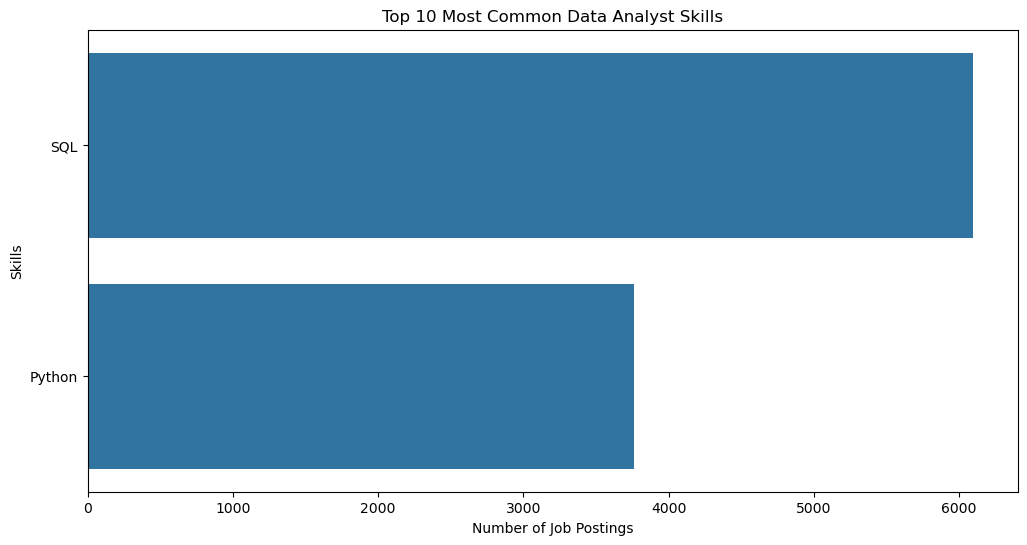

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

skills_df = pd.DataFrame(most_common_skills, columns=['Skill', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Skill', data=skills_df)
plt.title('Top 10 Most Common Data Analyst Skills')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.show()


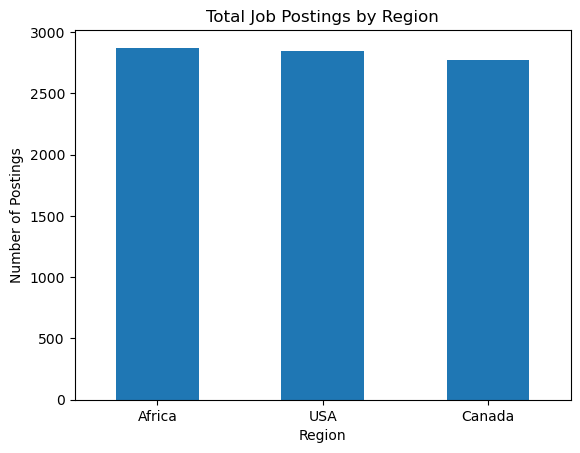

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming you have the combined dataframe from the previous step
df_combined['region'].value_counts().plot(kind='bar')
plt.title('Total Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Postings')
plt.xticks(rotation=0)
plt.show()

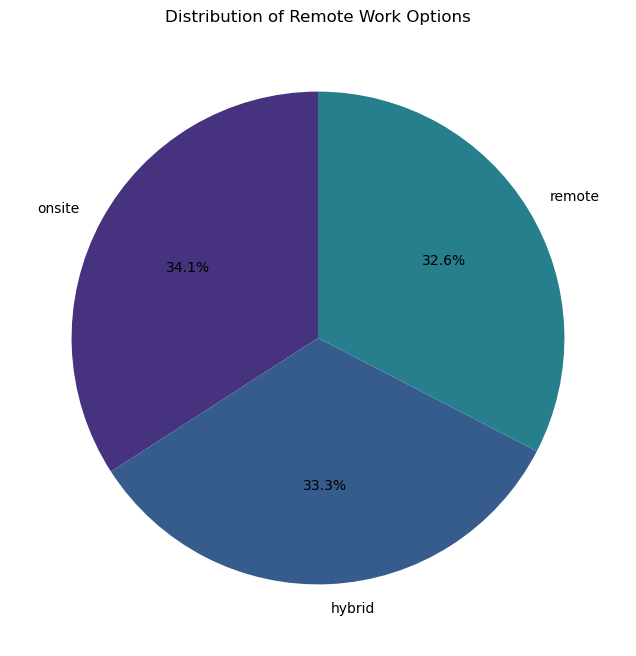

In [ ]:
# Count the number of postings for each work mode
remote_counts = df_combined['onsite_remote'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Remote Work Options')
plt.show()

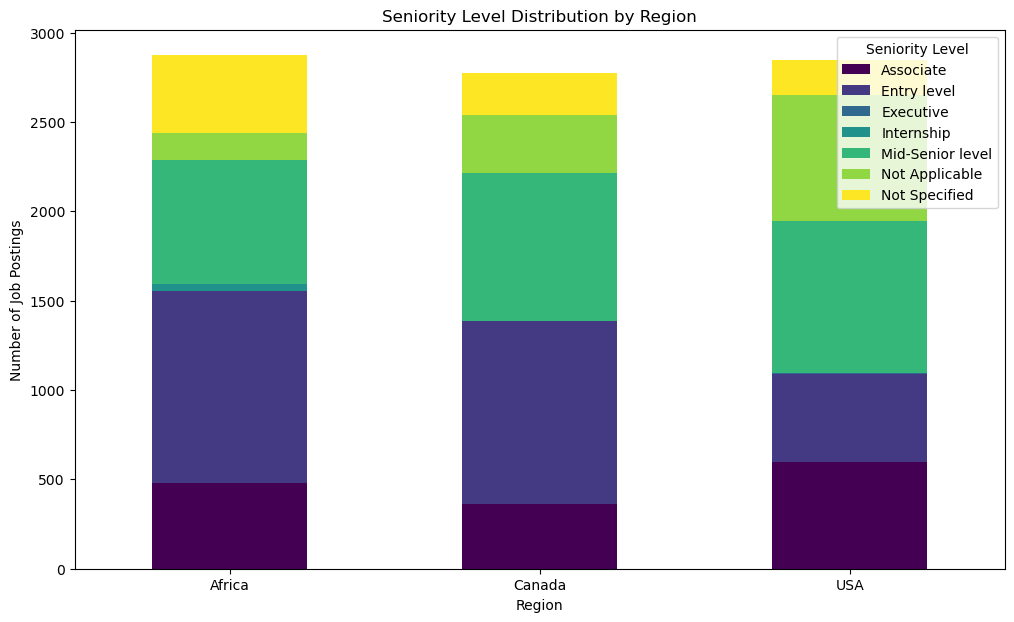

In [ ]:
# Helper function to extract seniority level
def get_seniority_level(criteria_list):
    try:
        # Safely evaluate the string to a Python list
        criteria_list = ast.literal_eval(criteria_list)
        for item in criteria_list:
            if 'Seniority level' in item:
                return item['Seniority level']
    except (ValueError, SyntaxError):
        # Handle cases where the string is not a valid list
        return 'Not Specified'
    return 'Not Specified'

# Apply the function to the combined dataframe
df_combined['seniority_level'] = df_combined['criteria'].apply(get_seniority_level)

# Create a crosstab to count occurrences of each seniority level per region
seniority_by_region = pd.crosstab(df_combined['region'], df_combined['seniority_level'])

# Plot the stacked bar chart
seniority_by_region.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Seniority Level Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.legend(title='Seniority Level')
plt.show()

C:\Users\deepapandiyan\AppData\Local\Temp\ipykernel_16056\2805271309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


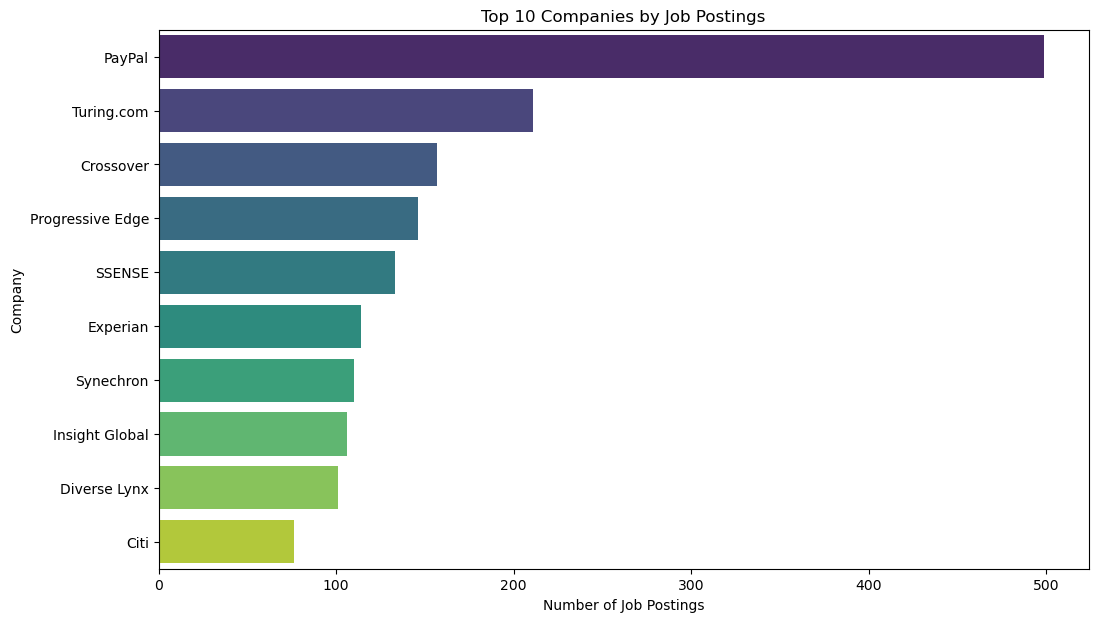

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import ast

# The combined dataframe from previous steps
# This code assumes the combined dataframe 'df_combined' is already created
# For full code, please refer to the previous response

# Top 10 Companies by Job Postings
top_companies = df_combined['company'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.show()
plt.savefig('top_companies.png')

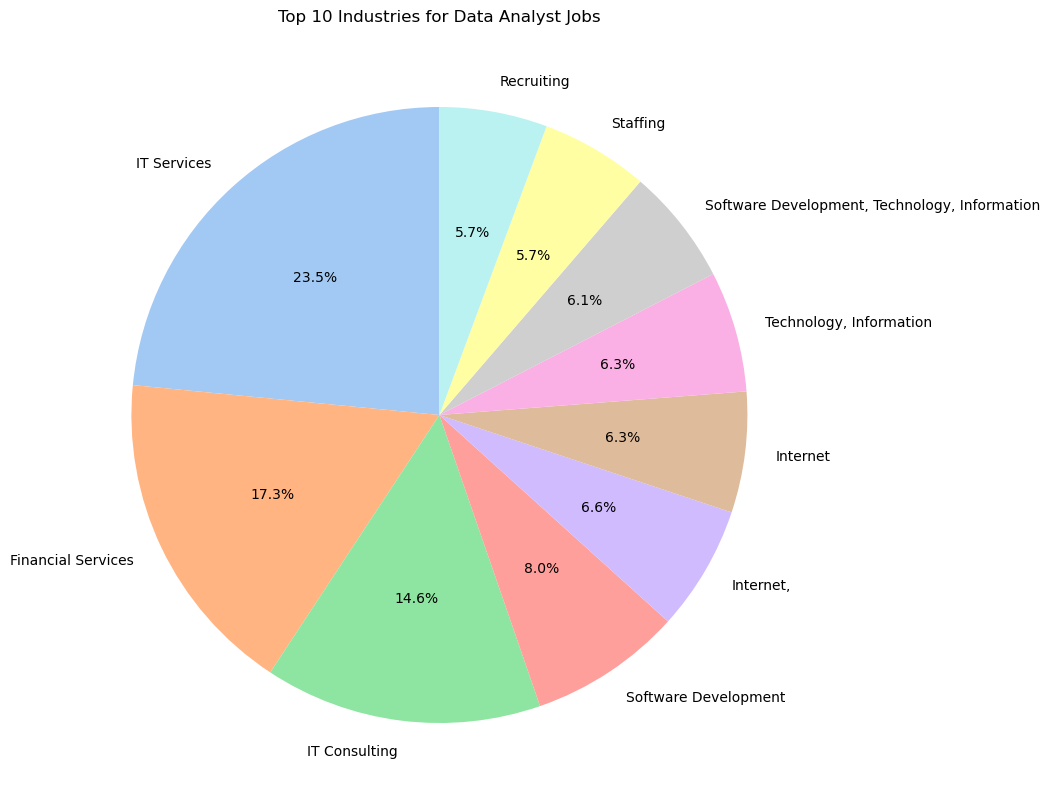

<Figure size 640x480 with 0 Axes>

In [ ]:
# Function to extract industries from the 'criteria' column
def extract_industries(criteria_list):
    try:
        criteria_list = ast.literal_eval(criteria_list)
        for item in criteria_list:
            if 'Industries' in item:
                # Split industries by ' and ' to handle multiple entries
                return [ind.strip() for ind in item['Industries'].split(' and ')]
    except (ValueError, SyntaxError):
        return []
    return []

# Apply the function and flatten the list of lists
all_industries = [industry for sublist in df_combined['criteria'].apply(extract_industries) for industry in sublist]

# Count the frequency of each industry
industry_counts = pd.Series(all_industries).value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Industries for Data Analyst Jobs')
plt.show()
plt.savefig('top_industries.png')

C:\Users\deepapandiyan\AppData\Local\Temp\ipykernel_16056\1448334810.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_function_counts.values, y=job_function_counts.index, palette='magma')


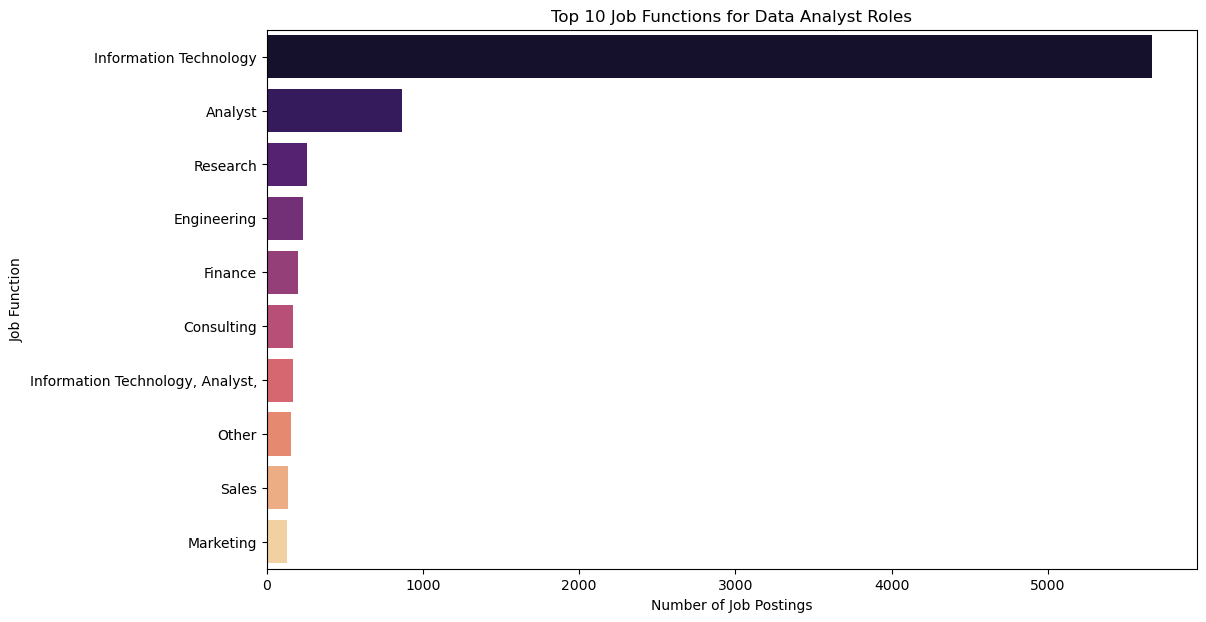

<Figure size 640x480 with 0 Axes>

In [ ]:
# Function to extract job functions from the 'criteria' column
def extract_job_functions(criteria_list):
    try:
        criteria_list = ast.literal_eval(criteria_list)
        for item in criteria_list:
            if 'Job function' in item:
                # Split job functions by ' and ' to handle multiple entries
                return [func.strip() for func in item['Job function'].split(' and ')]
    except (ValueError, SyntaxError):
        return []
    return []

# Apply the function and flatten the list of lists
all_job_functions = [func for sublist in df_combined['criteria'].apply(extract_job_functions) for func in sublist]

# Count the frequency of each job function
job_function_counts = pd.Series(all_job_functions).value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=job_function_counts.values, y=job_function_counts.index, palette='magma')
plt.title('Top 10 Job Functions for Data Analyst Roles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Function')
plt.show()
plt.savefig('top_job_functions.png')